# Lesson 3: Agentic Search


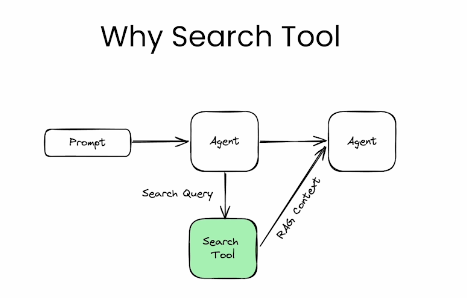


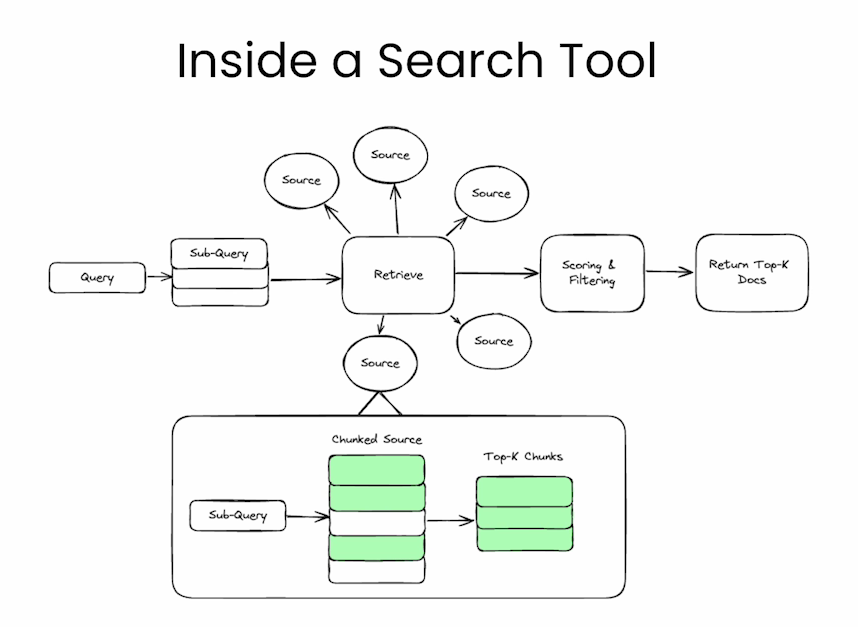


In [1]:
# libraries
from dotenv import load_dotenv
import os
from tavily import TavilyClient

# load environment variables from .env file
_ = load_dotenv()

# connect
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

In [2]:
# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]

'The new Nvidia Blackwell GPU features the Blackwell B200 architecture, which is a powerful single-chip GPU with 208 billion transistors. It is designed specifically for AI applications and is claimed to reduce AI inference operating costs and energy consumption by up to 25 times compared to its predecessor, the H100. Several major organizations, including Amazon Web Services, Google, Meta, and Microsoft, are expected to adopt the Blackwell platform.'

## Regular search


In [32]:
# choose location (try to change to your own city!)

city = "Ampang"

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

> Note: search was modified to return expected results in the event of an exception. High volumes of student traffic sometimes cause rate limit exceptions.


In [33]:
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import re

ddg = DDGS()


def search(query, max_results=6):
    try:
        results = ddg.text(query, max_results=max_results)
        return [i["href"] for i in results]
    except Exception as e:
        print(f"returning previous results due to exception reaching ddg.")
        results = [  # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results


for i in search(query):
    print(i)

https://weather.com/weather/tenday/l/Ampang+Selangor+Malaysia?canonicalCityId=40286e8c4458cb0562cb1fc4925bb49d88af851073231d8ffbd63f07d330ae5c
https://weather.com/ms-MY/weather/hourbyhour/l/Ampang+Selangor?canonicalCityId=40286e8c4458cb0562cb1fc4925bb49d88af851073231d8ffbd63f07d330ae5c
https://weather.com/weather/hourbyhour/l/Puchong+Selangor+Malaysia?canonicalCityId=753500608bcb120d7dd4f7226a27cd177117cc770e9bb0bfe515d00aed610f14


In [34]:
def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."

    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

> Note: This produces a long output, you may want to right click and clear the cell output after you look at it briefly to avoid scrolling past it.


In [35]:
# use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# scrape first wesbsite
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000])  # limit long outputs

Website: https://weather.com/weather/tenday/l/Ampang+Selangor+Malaysia?canonicalCityId=40286e8c4458cb0562cb1fc4925bb49d88af851073231d8ffbd63f07d330ae5c


<body><div class="appWrapper DaybreakLargeScreen LargeScreen lightTheme twcTheme DaybreakLargeScreen--appWrapper--3kKUE gradients--clearNight--2-RGV gradients--clearNight-top--3tFbG" id="appWrapper"><div class="region-meta"><div class="removeIfEmpty" id="WxuHtmlHead-meta-"></div></div><div class="region-topAds regionTopAds DaybreakLargeScreen--regionTopAds--2kcLJ"><div class="removeIfEmpty" id="WxuAd-topAds-53dce052-5465-4609-a555-c3a20ab64ab0"><div class="adWrapper BaseAd--adWrapper--1dWzA BaseAd--card--2G19u BaseAd--hide--3LkRr"><div class="adLabel BaseAd--adLabel--1LMu9">Advertisement</div><div class="ad_module BaseAd--ad_module--DeGCt subs-undefined BaseAd--placeholder--3IQan" id="WX_Hidden"></div></div></div><div class="removeIfEmpty" id="WxuAd-topAds-fe926b10-58bc-448a-ab09-47e692334250"><div class="adWrapper BaseAd--adWrapper--

In [36]:
# extract text
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)

print(f"Website: {url}\n\n")
print(weather_data)

Website: https://weather.com/weather/tenday/l/Ampang+Selangor+Malaysia?canonicalCityId=40286e8c4458cb0562cb1fc4925bb49d88af851073231d8ffbd63f07d330ae5c


recents Specialty Forecasts 10 Day Weather - Selangor, Selangor, Malaysia Tonight Sat 31 | Night Cloudy. Low 76F. Winds light and variable. Sun 01 Sun 01 | Day Cloudy skies. High 94F. Winds W at 5 to 10 mph. Sun 01 | Night Overcast. Low 77F. Winds light and variable. Mon 02 Mon 02 | Day Showers early then scattered thunderstorms developing later in the day. High 91F. Winds WSW at 5 to 10 mph. Chance of rain 50%. Mon 02 | Night Partly cloudy in the evening. Increasing clouds with periods of showers after midnight. Low 77F. Winds light and variable. Chance of rain 40%. Tue 03 Tue 03 | Day Rain showers in the morning with scattered thunderstorms arriving in the afternoon. High 92F. Winds WSW at 5 to 10 mph. Chance of rain 50%. Tue 03 | Night Partly cloudy in the evening. Increasing clouds with periods of showers after midnight. Low 76F. 

## Agentic Search


In [37]:
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]

print(data)

{'location': {'name': 'Ampang', 'region': 'Pahang', 'country': 'Malaysia', 'lat': 3.9, 'lon': 103.08, 'tz_id': 'Asia/Kuala_Lumpur', 'localtime_epoch': 1725124822, 'localtime': '2024-09-01 01:20'}, 'current': {'last_updated_epoch': 1725124500, 'last_updated': '2024-09-01 01:15', 'temp_c': 24.2, 'temp_f': 75.5, 'is_day': 0, 'condition': {'text': 'Cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/119.png', 'code': 1006}, 'wind_mph': 2.5, 'wind_kph': 4.0, 'wind_degree': 265, 'wind_dir': 'W', 'pressure_mb': 1011.0, 'pressure_in': 29.84, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 94, 'cloud': 69, 'feelslike_c': 26.8, 'feelslike_f': 80.2, 'windchill_c': 24.2, 'windchill_f': 75.5, 'heatindex_c': 26.8, 'heatindex_f': 80.2, 'dewpoint_c': 23.1, 'dewpoint_f': 73.7, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 1.0, 'gust_mph': 4.5, 'gust_kph': 7.2}}


In [38]:
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)

{
    "location": {
        "name": "Ampang",
        "region": "Pahang",
        "country": "Malaysia",
        "lat": 3.9,
        "lon": 103.08,
        "tz_id": "Asia/Kuala_Lumpur",
        "localtime_epoch": 1725124822,
        "localtime": "2024-09-01 01:20"
    },
    "current": {
        "last_updated_epoch": 1725124500,
        "last_updated": "2024-09-01 01:15",
        "temp_c": 24.2,
        "temp_f": 75.5,
        "is_day": 0,
        "condition": {
            "text": "Cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/night/119.png",
            "code": 1006
        },
        "wind_mph": 2.5,
        "wind_kph": 4.0,
        "wind_degree": 265,
        "wind_dir": "W",
        "pressure_mb": 1011.0,
        "pressure_in": 29.84,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 94,
        "cloud": 69,
        "feelslike_c": 26.8,
        "feelslike_f": 80.2,
        "windchill_c": 24.2,
        "windchill_f": 75.5,
        "heatindex